In [1]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# # # # # # #                                         # # # # # # #
# # # # # # #             Dimple Surface              # # # # # # # 
# # # # # # #                                         # # # # # # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [4]:
from veech import *

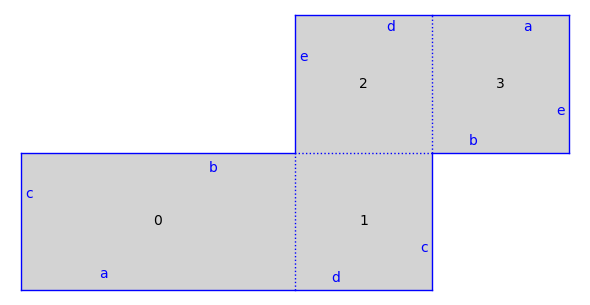

In [5]:
def dimple(x,y):

    def rectangle(a,b):
        return polygons(vertices = [(0,0),(a,0),(a,b),(0,b)])

    P1 = rectangle(x,y)
    Q1 = rectangle(1,y)
    R1 = rectangle(1,1)
    S1 = rectangle(y,1)
    
    s = Surface_list(QQ)

    s.add_polygon(P1)
    s.add_polygon(Q1)
    s.add_polygon(R1)
    s.add_polygon(S1)

    S = SimilaritySurface(s)

    s.set_edge_pairing(0,0,3,2)
    s.set_edge_pairing(0,1,1,3)
    s.set_edge_pairing(0,2,3,0)
    s.set_edge_pairing(0,3,1,1)
    s.set_edge_pairing(1,0,2,2)
    s.set_edge_pairing(1,2,2,0)
    s.set_edge_pairing(2,1,3,3)
    s.set_edge_pairing(2,3,3,1)

    gs = S.graphical_surface()

    gs.make_adjacent(1,2)
    gs.make_adjacent(2,1)      
    
    DS = S.minimal_cover(cover_type='dilation').copy(relabel=True)
    
    return DS, S, gs, s

DS, S, gs, s = dimple(2,1)
S.plot(edge_labels='letter')

In [4]:
# We first imagined the Dimple surface as a (1 by 1) square torus surface
# with an (x by x) square cut out, and replaced by a (1 by y) rectangle.
# 
# Then, we chose a presentation with the cut-out in the lower-left corner.
# The simplest presentation might be the following reparameterization:
# 
# Normalize Box 2 to be a unit square, and let x and y vary as the height and width of Box 0, respectively.
#
# The horizontal left-right sheers are generated by    [[1,z],    where  z = lcm( (x + 1)/y, y + 1).
#                                                       [0,1]]                   
# 
# The vertical up-down sheers are generated by         [[1, 0],   where z' = lcm(1/(y+1), xy/(y^2 + x)).
#                                                       [z',1]]
#                                                               
# This is because the surface decomposes into horizontal cylinders of moduli (x + 1)/y and y + 1,
# and it decomposes into vertical cylinders of moduli 1/(y+1) and xy/(y^2 + x).
# 
# These formulas match the results found,
# namely, the entries 6, 4, and 10 matrices for dimple(2,1), dimple(3,1), dimple(2,1).
# 
# Using FlatSurf, we are searching for Veech elements under certain simple parameters.
# Under the number of iterations we've tried so far, Flatsurf doesn't terminate,
# it just keeps finding more and more veech elements.

In [6]:
def pprint(matrices):
    print(str([[[m[0][0],m[0][1]],[m[1][0],m[1][1]]] for m in matrices]))

In [56]:
DS, S, gs, s = dimple(2,1)

IDC1 = IDC(DS, 30000, veech = 1, show_current_sym = 0)
show(S.plot())
show(IDC1.plot(model = 'UHP', figsize = 10)) #UHP or KMf
show(list(IDC1.generators(normalize_det=1)))
pprint(IDC1.generators(normalize_det=1))

KeyboardInterrupt: 

In [21]:
DS, S, gs, s = dimple(2,1)

In [11]:
A = matrix([[1, 0],
            [0, 1]])

In [21]:
show(DS.plot())
show((A*DS).plot())

In [17]:
show((DS).delaunay_triangulation().plot())
show((A*DS).delaunay_triangulation().plot())

In [18]:
show(DS.delaunay_decomposition().plot())
show((A*DS).delaunay_decomposition().plot())

In [20]:
show(DS.canonicalize().plot())
show((A*DS).canonicalize().plot())

In [51]:
z = -16
y = 2/5
# A = matrix([[1+z, -1*z/y],
#             [z*y, 1-z]])
A = matrix([[23,63],[-7,-19]])

show(A)

print(DS.canonicalize() == (A*DS).canonicalize())

[ 23  63]
[ -7 -19]

True
